<a href="https://colab.research.google.com/github/rvfalves/DIO_IA-Bootcamp/blob/main/Dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Colab notebook has the objective of presenting a dimension reduction code applied to an image.

In [2]:
import os

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

We can choose one or more images in the internet or upload someone else.

In [4]:
!wget --no-check-certificate \
    "https://www.merryfield.edu/wp-content/uploads/2023/08/diffeent-types-of-dog-breeds-300x214.jpg" \
    -O "/home/test.jpg"
root = '/home/'
images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(root) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
print(images)

--2025-01-31 18:46:42--  https://www.merryfield.edu/wp-content/uploads/2023/08/diffeent-types-of-dog-breeds-300x214.jpg
Resolving www.merryfield.edu (www.merryfield.edu)... 35.238.17.118
Connecting to www.merryfield.edu (www.merryfield.edu)|35.238.17.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9244 (9.0K) [image/jpeg]
Saving to: ‘/home/test.jpg’

/home/test.jpg      100%[===================>]   9.03K  --.-KB/s    in 0.001s  

2025-01-31 18:46:43 (16.0 MB/s) - ‘/home/test.jpg’ saved [9244/9244]

['/home/test.jpg']


Here we are using just one image to show the process.

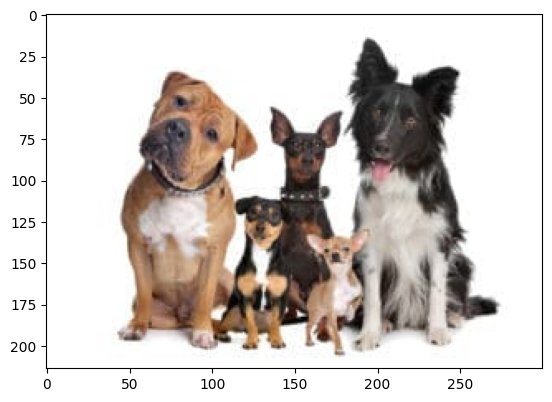

In [5]:
figure = plt.imread(images[0])
plt.imshow(figure)

Creating a numpy array.

In [6]:
figure_np = np.array(figure)
print(figure_np.shape)

(214, 300, 3)


We will apply the luminosity method to convert the RGB to gray scale. It averages the values of Red, Green and Blue, but it forms a weighted average to account for human perception. We’re more sensitive to green than other colors, so green is weighted most heavily. The formula for luminosity is 0.21 R + 0.72 G + 0.07 B. So we can apply this into the RGB matrix nd reduce dimension of the array.

(214, 300)
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


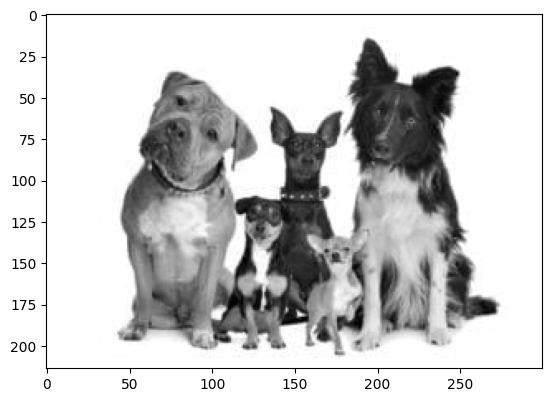

In [9]:
figure_gray_scale = 0.21*figure_np[:,:,0] + 0.72*figure_np[:,:,1] + 0.07*figure_np[:,:,2]
figure_gray_scale.reshape(214,300,1)
print(figure_gray_scale.shape)
plt.imshow(figure_gray_scale, cmap='gray')
print(figure_gray_scale)

Now, we can normalize the matrix, dividing all values by 255 (there are 256 - 0 to 255 - shades of gray). Rounding the values to the nearest integer, we will have a binary matrix. This represents a white and black image.

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


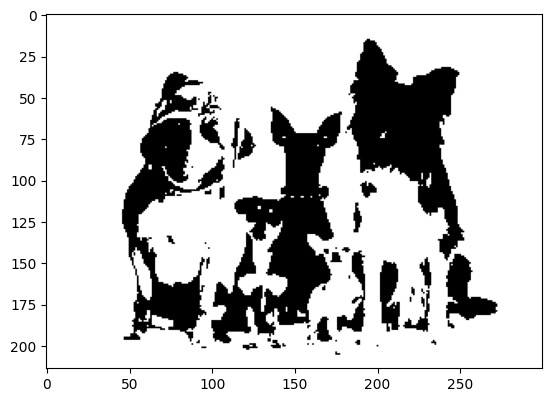

In [10]:
figure_norm = np.rint(figure_gray_scale/255.)
plt.imshow(figure_norm, cmap='gray')
print(figure_norm)